In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

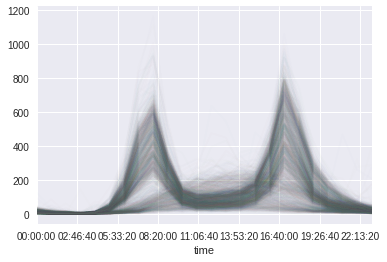

In [2]:
from jvdp_workflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [3]:
X = pivoted.fillna(0).T.values
X.shape

(1885, 24)

In [4]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [5]:
X2.shape

(1885, 2)

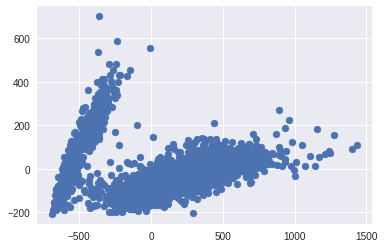

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
labels.sum()/len(labels)
# 5/7

0.69071618037135274

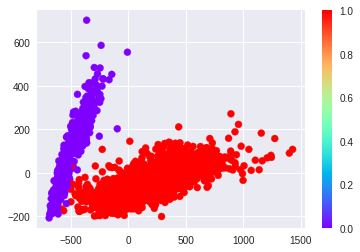

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap = "rainbow")
plt.colorbar()

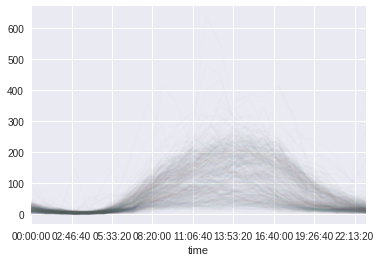

In [10]:
pivoted.T[labels == 0].T.plot(legend=False, alpha = 0.01)

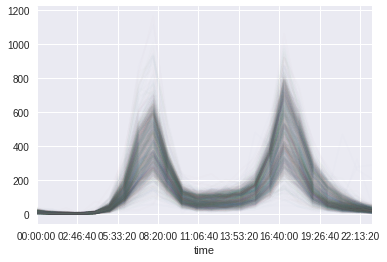

In [11]:
pivoted.T[labels == 1].T.plot(legend=False, alpha = 0.01)

In [12]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', length=1885)

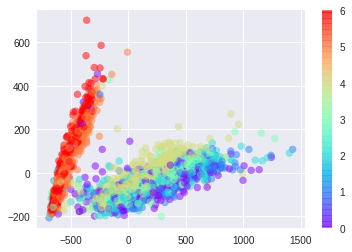

In [13]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap = "rainbow", alpha = 0.5)
plt.colorbar()

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24'],
              dtype='datetime64[ns]', freq=None)